In [13]:
from heat_pinn import *

TIMER_REPEAT_TIMES = 25

# Generate constants throughout this app!!
const_params = PinnConstParam()
solve_analytical_and_numerical(const_params)
plotter = Plotter(2, 2)
plot_analytical_and_numerical(plotter, const_params)

NameError: name 'solve_analytical_and_numerical' is not defined

# Test 1: Default parameters from DeepXde

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "


train_bc_points shape (240, 2)
train_next_batch shape (3020, 2)


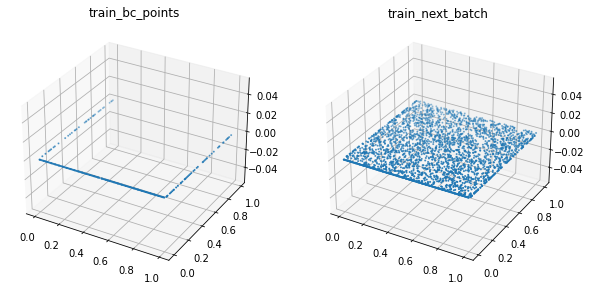

In [2]:
# Create model and plot training data
test_params = PinnTestParam()
geomtime_data, model = create_model(const_params, test_params)
plot_train_data(geomtime_data)

Compiling model...
Building feed-forward neural network...
'build' took 0.034546 s



/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
2021-12-12 17:20:33.859207: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-12-12 17:20:33.859924: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-12-12 17:20:33.883887: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_UNKNOWN: un

'compile' took 0.230950 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [3.51e-01, 2.90e-01, 2.76e-01]    [3.40e-01, 2.90e-01, 2.76e-01]    []  


2021-12-12 17:20:34.059863: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:196] None of the MLIR optimization passes are enabled (registered 0 passes)
2021-12-12 17:20:34.063311: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3593250000 Hz


1000      [1.76e-03, 8.47e-04, 4.33e-04]    [1.02e-03, 8.47e-04, 4.33e-04]    []  
2000      [1.55e-04, 2.49e-05, 6.36e-06]    [9.64e-05, 2.49e-05, 6.36e-06]    []  
3000      [5.53e-05, 1.67e-05, 1.82e-06]    [3.40e-05, 1.67e-05, 1.82e-06]    []  
4000      [3.62e-05, 1.33e-05, 1.30e-06]    [2.23e-05, 1.33e-05, 1.30e-06]    []  
5000      [5.15e-05, 1.66e-05, 2.54e-05]    [3.45e-05, 1.66e-05, 2.54e-05]    []  
6000      [2.25e-05, 8.44e-06, 9.11e-07]    [1.47e-05, 8.44e-06, 9.11e-07]    []  
7000      [1.82e-05, 7.18e-06, 4.58e-07]    [1.26e-05, 7.18e-06, 4.58e-07]    []  
8000      [1.51e-05, 5.23e-06, 6.81e-07]    [1.04e-05, 5.23e-06, 6.81e-07]    []  
9000      [1.79e-05, 9.05e-06, 2.41e-06]    [1.08e-05, 9.05e-06, 2.41e-06]    []  
10000     [1.09e-05, 3.66e-06, 2.33e-07]    [8.57e-06, 3.66e-06, 2.33e-07]    []  
11000     [9.87e-06, 3.28e-06, 2.97e-07]    [6.84e-06, 3.28e-06, 2.97e-07]    []  
12000     [8.21e-06, 2.58e-06, 2.54e-07]    [5.94e-06, 2.58e-06, 2.54e-07]    []  
1300

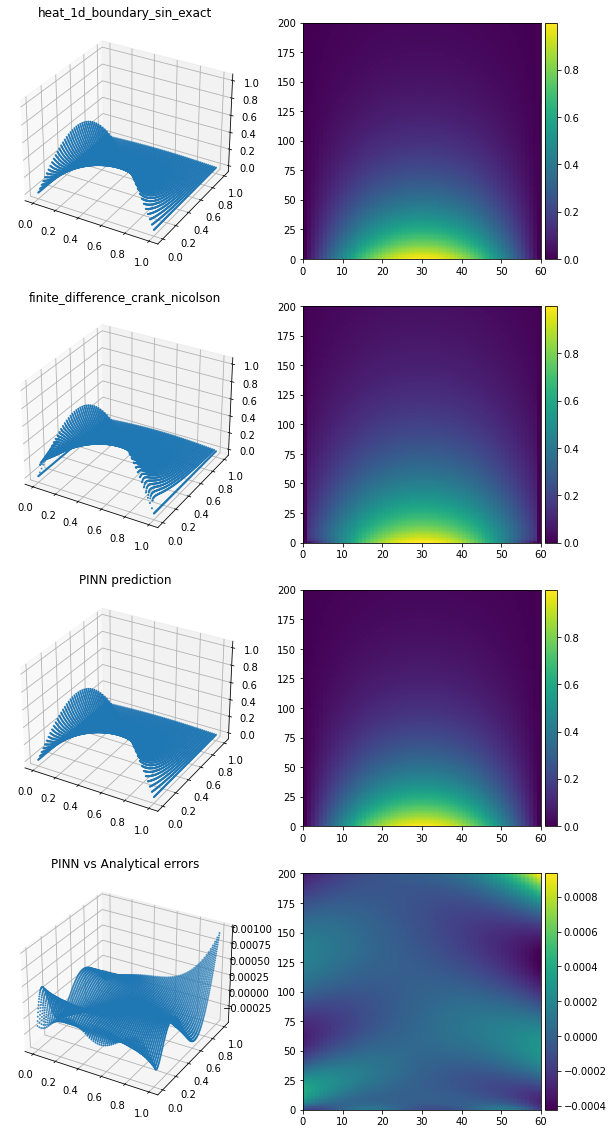

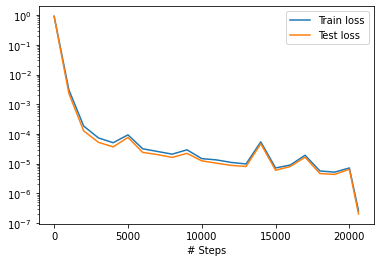

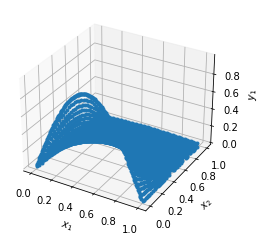

IGNORE ^^^ PDE test data SOLUTION PLOT!!! ^^^
---Performance measured wrt analytical solution---
Mean residual: 0.3379268
L2 relative error: 0.0005414913032112127
--- Report ---
Mean absolute error:  9.951867192804745e-05
Mean squared error:  1.852332136274866e-08
Max error:  0.0009338259696960425
Pinn Const Param: 
a: 0.4
L: 1
n: 1
t_end: 1
test_x_dim: 60
test_t_dim: 200
analytical_function_name: heat_1d_boundary_sin_exact
numerical_function_name: finite_difference_crank_nicolson

Pinn Test Param: 
d_num_domain: 2540
d_num_boundary: 80
d_num_initial: 160
nn_hidden_layer_size: 20
nn_hidden_layer_num: 3



In [3]:
# Train model and output results
losshistory, train_state = train_model(model)
predict_and_output_report(const_params, model, losshistory, train_state, test_params=test_params)


# Test 2: Reduce hidden layers and size to break solution

In [4]:
test_params = PinnTestParam()
test_params.nn_hidden_layer_num = 1
test_params.nn_hidden_layer_size = 5

geomtime_data, model = create_model(const_params, test_params)

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "


Compiling model...
Building feed-forward neural network...
'build' took 0.016353 s



/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
2021-12-12 17:21:45.050405: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set


'compile' took 0.134880 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [2.16e-03, 6.14e-04, 4.71e-01]    [2.39e-03, 6.14e-04, 4.71e-01]    []  
1000      [2.36e-02, 4.11e-02, 8.71e-02]    [2.08e-02, 4.11e-02, 8.71e-02]    []  
2000      [2.17e-02, 3.60e-02, 7.10e-02]    [1.86e-02, 3.60e-02, 7.10e-02]    []  
3000      [2.04e-02, 2.08e-02, 5.05e-02]    [1.82e-02, 2.08e-02, 5.05e-02]    []  
4000      [1.68e-02, 1.54e-02, 3.89e-02]    [1.47e-02, 1.54e-02, 3.89e-02]    []  
5000      [9.69e-03, 4.02e-03, 1.20e-02]    [7.02e-03, 4.02e-03, 1.20e-02]    []  
6000      [8.27e-03, 3.75e-03, 1.03e-02]    [6.01e-03, 3.75e-03, 1.03e-02]    []  
7000      [6.83e-03, 3.94e-03, 8.86e-03]    [4.98e-03, 3.94e-03, 8.86e-03]    []  
8000      [5.70e-03, 4.32e-03, 7.69e-03]    [4.31e-03, 4.32e-03, 7.69e-03]    []  
9000      [5.12e-03, 4.51e-03, 7.06e-03]    [4.00e-03, 4.51e-03, 7.06e-03]    []  
10000   

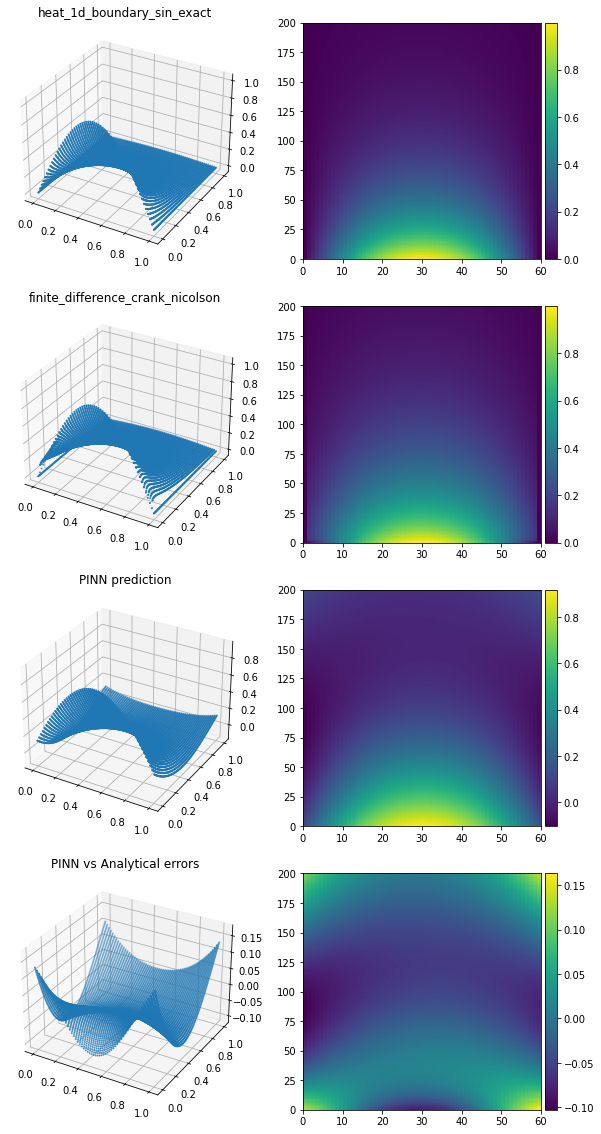

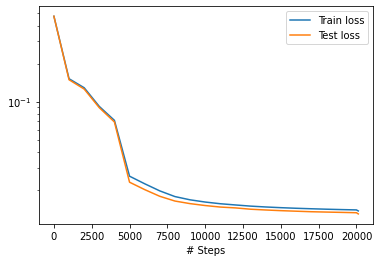

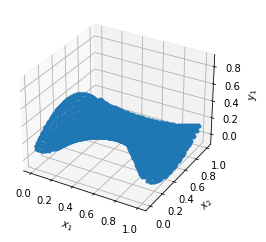

IGNORE ^^^ PDE test data SOLUTION PLOT!!! ^^^
---Performance measured wrt analytical solution---
Mean residual: 0.46001196
L2 relative error: 0.18139915217910918
--- Report ---
Mean absolute error:  0.03808376667327637
Mean squared error:  0.0020787697838603133
Max error:  0.16302937269210804
Pinn Const Param: 
a: 0.4
L: 1
n: 1
t_end: 1
test_x_dim: 60
test_t_dim: 200
analytical_function_name: heat_1d_boundary_sin_exact
numerical_function_name: finite_difference_crank_nicolson

Pinn Test Param: 
d_num_domain: 2540
d_num_boundary: 80
d_num_initial: 160
nn_hidden_layer_size: 5
nn_hidden_layer_num: 1



In [5]:
# Train model and output results
losshistory, train_state = train_model(model)
predict_and_output_report(const_params, model, losshistory, train_state, test_params=test_params)


# Test 3: Reduce boundary points to break solution

train_bc_points shape (6, 2)
train_next_batch shape (2552, 2)


/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+5=5. 
  warnings.warn("The balance properties of Sobol' points require "


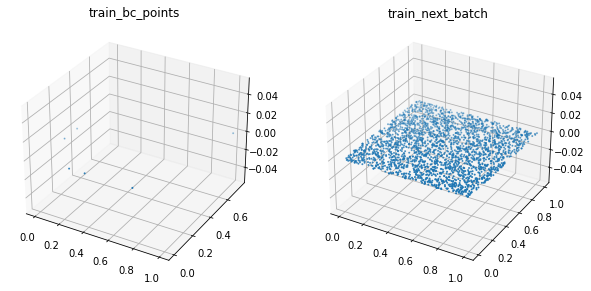

In [6]:
test_params = PinnTestParam()
test_params.d_num_boundary = 3
test_params.d_num_initial = 3

geomtime_data, model = create_model(const_params, test_params)
plot_train_data(geomtime_data)

Compiling model...
Building feed-forward neural network...
'build' took 0.033967 s



/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
2021-12-12 17:22:03.685774: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set


'compile' took 0.229043 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [2.26e-02, 1.32e-01, 1.23e+00]    [2.22e-02, 1.32e-01, 1.23e+00]    []  
1000      [4.77e-04, 2.43e-03, 3.68e-03]    [4.08e-04, 2.43e-03, 3.68e-03]    []  
2000      [3.88e-04, 4.96e-05, 1.31e-03]    [2.90e-04, 4.96e-05, 1.31e-03]    []  
3000      [2.32e-04, 2.19e-05, 4.56e-04]    [1.81e-04, 2.19e-05, 4.56e-04]    []  
4000      [1.68e-04, 2.41e-05, 1.92e-04]    [1.35e-04, 2.41e-05, 1.92e-04]    []  
5000      [1.25e-04, 1.41e-05, 8.61e-05]    [9.74e-05, 1.41e-05, 8.61e-05]    []  
6000      [1.71e-04, 5.62e-05, 7.23e-05]    [1.43e-04, 5.62e-05, 7.23e-05]    []  
7000      [5.97e-05, 4.06e-06, 1.67e-05]    [4.57e-05, 4.06e-06, 1.67e-05]    []  
8000      [4.27e-05, 2.06e-06, 7.69e-06]    [3.30e-05, 2.06e-06, 7.69e-06]    []  
9000      [3.89e-05, 1.29e-06, 1.00e-05]    [3.13e-05, 1.29e-06, 1.00e-05]    []  
10000   

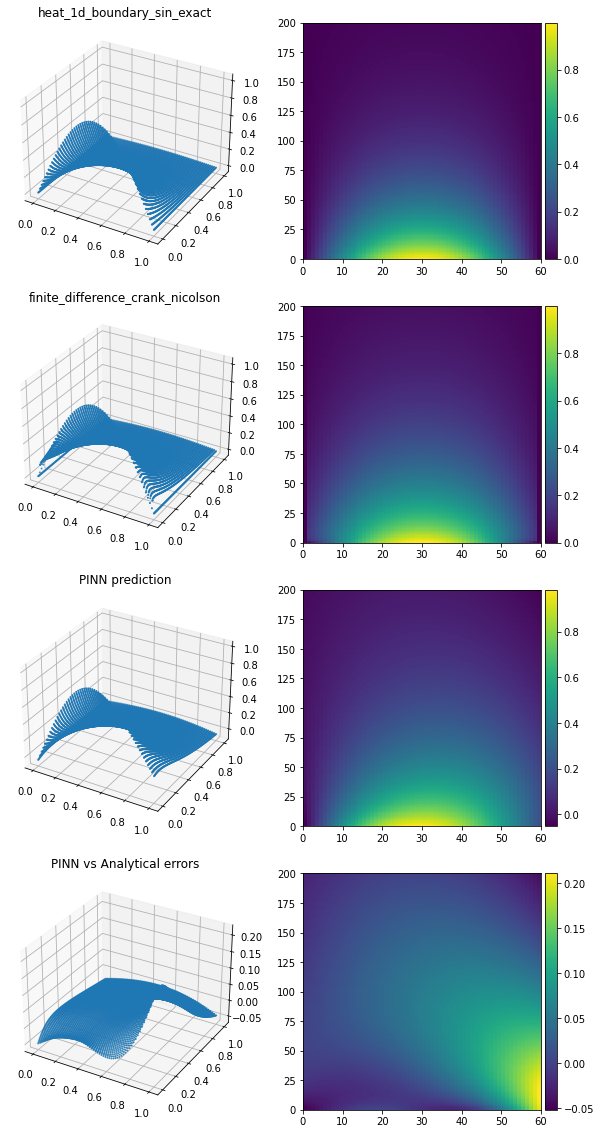

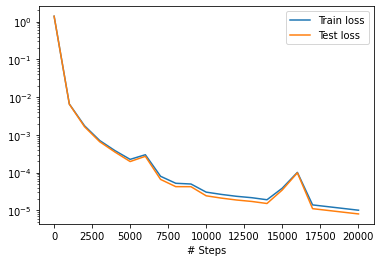

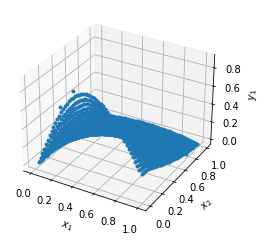

IGNORE ^^^ PDE test data SOLUTION PLOT!!! ^^^
---Performance measured wrt analytical solution---
Mean residual: 0.36480147
L2 relative error: 0.22315728480440247
--- Report ---
Mean absolute error:  0.03926561185865424
Mean squared error:  0.0031459949914439487
Max error:  0.21061556041240684
Pinn Const Param: 
a: 0.4
L: 1
n: 1
t_end: 1
test_x_dim: 60
test_t_dim: 200
analytical_function_name: heat_1d_boundary_sin_exact
numerical_function_name: finite_difference_crank_nicolson

Pinn Test Param: 
d_num_domain: 2540
d_num_boundary: 3
d_num_initial: 3
nn_hidden_layer_size: 20
nn_hidden_layer_num: 3



In [7]:
# Train model and output results
losshistory, train_state = train_model(model)
predict_and_output_report(const_params, model, losshistory, train_state, test_params=test_params)

# Test 4: Reduce domain to break solution

train_bc_points shape (240, 2)
train_next_batch shape (530, 2)


/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+52=52. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "


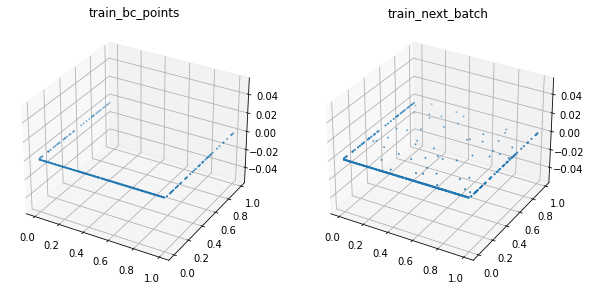

In [8]:
test_params = PinnTestParam()
test_params.d_num_domain = 50

geomtime_data, model = create_model(const_params, test_params)
plot_train_data(geomtime_data)

Compiling model...
Building feed-forward neural network...
'build' took 0.042239 s



/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
2021-12-12 17:23:01.537705: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set


'compile' took 0.256940 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [6.18e-02, 6.77e-02, 2.49e-01]    [9.17e-02, 6.77e-02, 2.49e-01]    []  
1000      [1.09e-03, 1.11e-03, 4.83e-04]    [1.37e-03, 1.11e-03, 4.83e-04]    []  
2000      [3.98e-04, 5.43e-05, 6.82e-05]    [1.22e-03, 5.43e-05, 6.82e-05]    []  
3000      [1.80e-04, 1.01e-05, 2.86e-05]    [7.07e-04, 1.01e-05, 2.86e-05]    []  
4000      [1.17e-04, 4.01e-06, 1.42e-05]    [4.96e-04, 4.01e-06, 1.42e-05]    []  
5000      [8.34e-05, 2.20e-06, 7.89e-06]    [3.57e-04, 2.20e-06, 7.89e-06]    []  
6000      [5.70e-05, 1.47e-06, 4.62e-06]    [2.59e-04, 1.47e-06, 4.62e-06]    []  
7000      [1.53e-03, 2.60e-05, 2.79e-05]    [3.86e-04, 2.60e-05, 2.79e-05]    []  
8000      [2.65e-05, 8.73e-07, 1.70e-06]    [1.41e-04, 8.73e-07, 1.70e-06]    []  
9000      [1.98e-05, 7.77e-07, 1.27e-06]    [1.12e-04, 7.77e-07, 1.27e-06]    []  
10000   

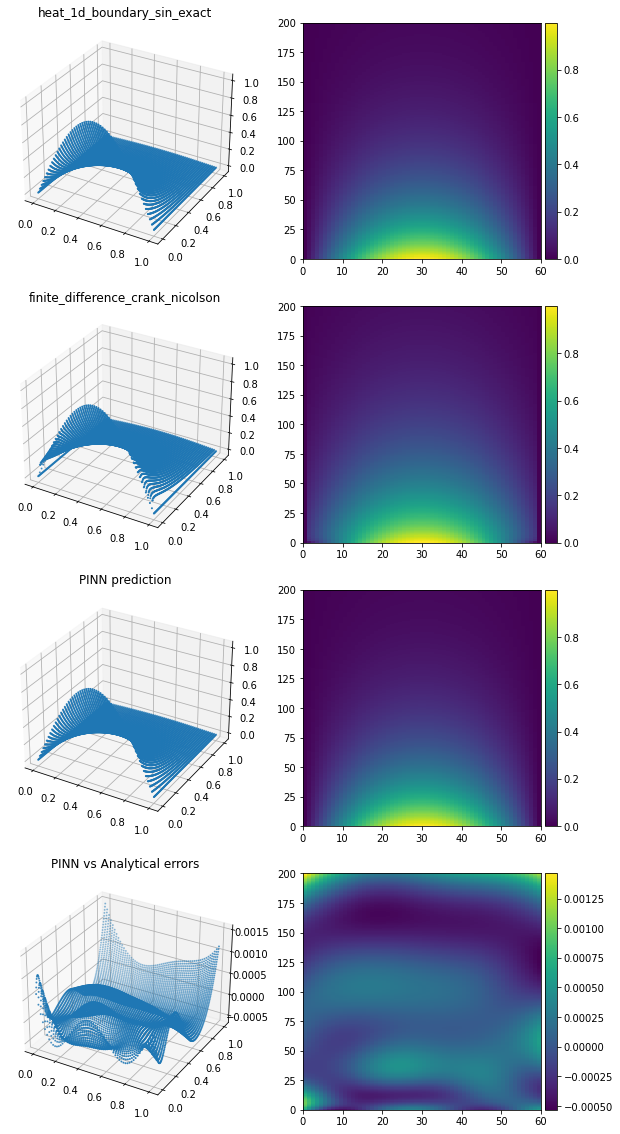

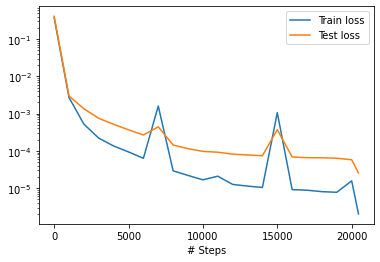

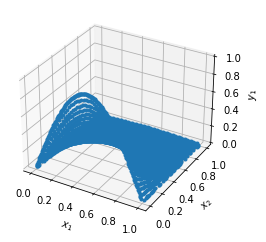

IGNORE ^^^ PDE test data SOLUTION PLOT!!! ^^^
---Performance measured wrt analytical solution---
Mean residual: 0.3377962
L2 relative error: 0.0010700285194324693
--- Report ---
Mean absolute error:  0.0002176269206596843
Mean squared error:  7.233135414239369e-08
Max error:  0.0014623850584030151
Pinn Const Param: 
a: 0.4
L: 1
n: 1
t_end: 1
test_x_dim: 60
test_t_dim: 200
analytical_function_name: heat_1d_boundary_sin_exact
numerical_function_name: finite_difference_crank_nicolson

Pinn Test Param: 
d_num_domain: 50
d_num_boundary: 80
d_num_initial: 160
nn_hidden_layer_size: 20
nn_hidden_layer_num: 3



In [9]:
# Train model and output results
losshistory, train_state = train_model(model)
predict_and_output_report(const_params, model, losshistory, train_state, test_params=test_params)


# Test 5: Reduce train data (domain and bc) to break solution

train_bc_points shape (20, 2)
train_next_batch shape (90, 2)


/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+52=52. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+12=12. 
  warnings.warn("The balance properties of Sobol' points require "


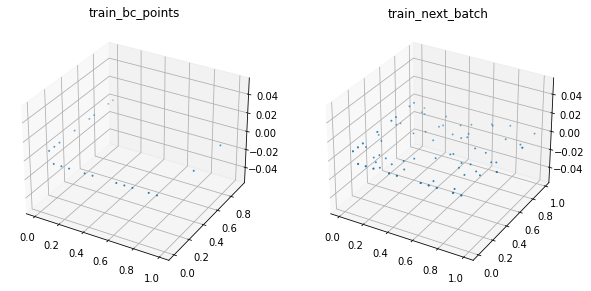

In [10]:
test_params = PinnTestParam()
test_params.d_num_domain = 50
test_params.d_num_boundary = 10
test_params.d_num_initial = 10

geomtime_data, model = create_model(const_params, test_params)
plot_train_data(geomtime_data)

Compiling model...
Building feed-forward neural network...
'build' took 0.028489 s



/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
2021-12-12 17:23:27.365621: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set


'compile' took 0.235112 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [6.10e-01, 3.19e-01, 2.23e-01]    [5.56e-01, 3.19e-01, 2.23e-01]    []  
1000      [1.30e-03, 1.01e-03, 3.50e-03]    [2.17e-03, 1.01e-03, 3.50e-03]    []  
2000      [2.42e-04, 6.85e-05, 5.17e-05]    [9.73e-04, 6.85e-05, 5.17e-05]    []  
3000      [7.66e-05, 1.28e-05, 9.04e-06]    [5.31e-04, 1.28e-05, 9.04e-06]    []  
4000      [4.19e-05, 5.42e-06, 3.82e-06]    [3.62e-04, 5.42e-06, 3.82e-06]    []  
5000      [2.87e-05, 3.95e-06, 2.32e-06]    [3.05e-04, 3.95e-06, 2.32e-06]    []  
6000      [2.26e-05, 4.26e-06, 3.21e-06]    [2.62e-04, 4.26e-06, 3.21e-06]    []  
7000      [2.25e-04, 4.15e-05, 1.04e-05]    [3.00e-04, 4.15e-05, 1.04e-05]    []  
8000      [1.33e-05, 2.14e-06, 1.05e-06]    [2.35e-04, 2.14e-06, 1.05e-06]    []  
9000      [1.10e-05, 1.85e-06, 9.22e-07]    [2.25e-04, 1.85e-06, 9.22e-07]    []  
10000   

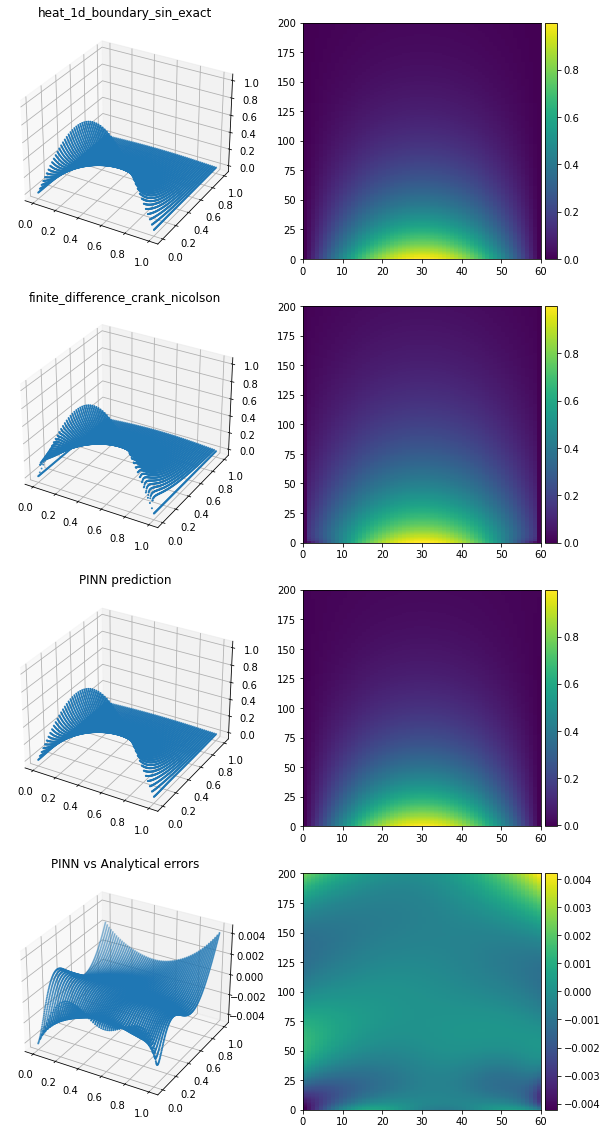

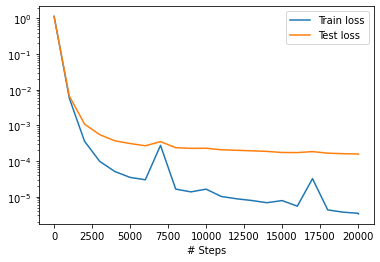

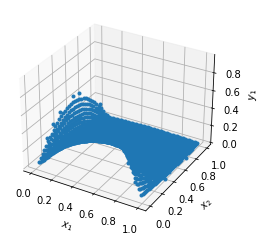

IGNORE ^^^ PDE test data SOLUTION PLOT!!! ^^^
---Performance measured wrt analytical solution---
Mean residual: 0.33977377
L2 relative error: 0.002994597397402537
--- Report ---
Mean absolute error:  0.0005432467134929157
Mean squared error:  5.665167763551067e-07
Max error:  0.004215586930513382
Pinn Const Param: 
a: 0.4
L: 1
n: 1
t_end: 1
test_x_dim: 60
test_t_dim: 200
analytical_function_name: heat_1d_boundary_sin_exact
numerical_function_name: finite_difference_crank_nicolson

Pinn Test Param: 
d_num_domain: 50
d_num_boundary: 10
d_num_initial: 10
nn_hidden_layer_size: 20
nn_hidden_layer_num: 3



In [11]:
# Train model and output results
losshistory, train_state = train_model(model)
predict_and_output_report(const_params, model, losshistory, train_state, test_params=test_params)
